In [2]:
%cd /content/drive/MyDrive/MCUT/R911R912
!ls

/content/drive/MyDrive/MCUT/R911R912
20220413		code	     test.csv
ARO1_pearsonr_corr.csv	data	     Untitled0.ipynb
ARO1特徵因子分析.ipynb	dataset.pkl  Untitled1.ipynb
ARO2_pearsonr_corr.csv	model
ARO2特徵因子分析.ipynb	PPT


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [4]:
df_x = pd.read_excel("data/ADS47/R911R912 _明志蔡教授_R4-ARO2.xlsx", sheet_name = "R911R912_TAG相關錶點資料(X)")

In [5]:
df = df_x[["Unnamed: 0", "ARO2-DCS-PDI91101", "ARO2-DCS-PDI91201", "ARO2-DCS-FI91601", "ARO2-DCS-FI91701", "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water"]]
df["Unnamed: 0"] = range(60679)
df.loc[df["ARO2-LIMS-S905@Water"] == "Over Range", "ARO2-LIMS-S905@Water"] = np.nan
df.loc[df["ARO2-LIMS-S907@Water"] == "Over Range", "ARO2-LIMS-S907@Water"] = np.nan
# df = df[df["ARO2-LIMS-S905@Water"].notnull() & df["ARO2-LIMS-S907@Water"].notnull()]
# df.columns.values[0] = "time(hr)"
from tqdm import tqdm
for i in tqdm(df.columns):
    df[i] = pd.to_numeric(df[i], errors='coerce')

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,Unnamed: 0,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water
0,0,2.731854,3.547650,249.573349,500.489868,NaN,NaN
1,1,2.731864,3.547517,249.627914,500.495331,NaN,NaN
2,2,2.731875,3.547384,249.682480,500.500793,NaN,NaN
3,3,2.731885,3.547251,249.737045,500.506256,NaN,NaN
4,4,2.731896,3.547118,249.791611,500.511719,NaN,NaN
...,...,...,...,...,...,...,...
60674,60674,3.376228,3.603930,545.488342,629.368591,NaN,NaN
60675,60675,3.378542,3.601583,508.997894,576.146851,NaN,NaN
60676,60676,3.397708,3.592693,541.041016,636.753174,NaN,NaN
60677,60677,3.344053,3.705959,547.967651,638.237244,NaN,NaN


In [7]:
for i in range(len(df)-1):
  df.loc[i+1, "btw_t"] = df["Unnamed: 0"][i+1] - df["Unnamed: 0"][i]
  df.loc[i+1, "btw_ARO2-DCS-PDI91101"] = df["ARO2-DCS-PDI91101"][i+1] - df["ARO2-DCS-PDI91101"][i]
  df.loc[i+1, "btw_ARO2-DCS-PDI91201"] = df["ARO2-DCS-PDI91201"][i+1] - df["ARO2-DCS-PDI91201"][i]

df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Unnamed: 0,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,btw_t,btw_ARO2-DCS-PDI91101,btw_ARO2-DCS-PDI91201
0,0,2.731854,3.547650,249.573349,500.489868,NaN,NaN,NaN,NaN,NaN
1,1,2.731864,3.547517,249.627914,500.495331,NaN,NaN,1.0,0.000010,-0.000133
2,2,2.731875,3.547384,249.682480,500.500793,NaN,NaN,1.0,0.000010,-0.000133
3,3,2.731885,3.547251,249.737045,500.506256,NaN,NaN,1.0,0.000010,-0.000133
4,4,2.731896,3.547118,249.791611,500.511719,NaN,NaN,1.0,0.000010,-0.000133
...,...,...,...,...,...,...,...,...,...,...
60674,60674,3.376228,3.603930,545.488342,629.368591,NaN,NaN,1.0,0.051777,-0.007429
60675,60675,3.378542,3.601583,508.997894,576.146851,NaN,NaN,1.0,0.002314,-0.002347
60676,60676,3.397708,3.592693,541.041016,636.753174,NaN,NaN,1.0,0.019166,-0.008891
60677,60677,3.344053,3.705959,547.967651,638.237244,NaN,NaN,1.0,-0.053655,0.113266


In [8]:
test_df = df.loc[df["btw_ARO2-DCS-PDI91201"] > 0, ["btw_ARO2-DCS-PDI91201", "btw_t", "ARO2-DCS-FI91601", "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water"]].reset_index()
test_df['ARO2-LIMS-S905@Water'].fillna(method='bfill', inplace=True)
test_df['ARO2-LIMS-S905@Water'].fillna(method='ffill', inplace=True)
test_df['ARO2-LIMS-S907@Water'].fillna(method='bfill', inplace=True)
test_df['ARO2-LIMS-S907@Water'].fillna(method='ffill', inplace=True)


In [9]:
N = 0
for i in range(len(test_df)):
  if test_df["index"][i+1] == test_df["index"][i]+1:
    N = N + 1
  else:
    N = N + 1
    test_df.loc[i+1-N, "time"] = N
    test_df.loc[i+1-N, "mean_ARO2-DCS-PDI91201"] = test_df.loc[i+1-N:i+1, "btw_ARO2-DCS-PDI91201"].mean()
    N = 0

KeyError: ignored

In [10]:
row = test_df[test_df["time"].notnull()].index.tolist()
for i in range(len(row)):
  pca = PCA(n_components = 1)
  X = test_df.loc[row[i]:row[i+1], ["ARO2-DCS-FI91601",  "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water"]]
  pca.fit(X)
  test_df.loc[row[i]:row[i+1], "pca"]  = pca.transform(X).reshape(X.shape[0],).tolist()
  test_df.loc[row[i], "mean_pca"] = test_df.loc[row[i]:row[i+1], "pca"].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/usr/local/lib/python3.7/dist-packa

IndexError: ignored

In [11]:
plt_df = test_df[test_df["pca"].notnull()]
plt_df

,index,btw_ARO2-DCS-PDI91201,btw_t,ARO2-DCS-FI91601,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,time,mean_ARO2-DCS-PDI91201,pca,mean_pca
0,4617,0.293029,1.0,503.322266,65.611740,93.679619,2.0,0.337991,-2.009857,0.000000e+00
1,4618,0.225574,1.0,508.020416,65.611740,93.679619,NaN,NaN,2.688293,NaN
2,4621,0.495370,1.0,504.653687,65.611740,93.679619,2.0,0.352006,-0.110260,0.000000e+00
3,4622,0.067093,1.0,503.332489,65.611740,93.679619,NaN,NaN,1.210938,NaN
4,4625,0.493556,1.0,505.644104,65.611740,93.679619,1.0,0.248290,-0.624237,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
27680,60663,0.121548,1.0,544.290283,63.099998,68.800003,1.0,0.144590,1.222565,0.000000e+00
27681,60666,0.167633,1.0,546.735413,63.099998,68.800003,1.0,0.115624,0.424133,0.000000e+00
27682,60668,0.063616,1.0,547.583679,63.099998,68.800003,2.0,0.089156,-1.147929,3.789561e-14
27683,60669,0.135962,1.0,550.575256,63.099998,68.800003,NaN,NaN,-4.139506,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


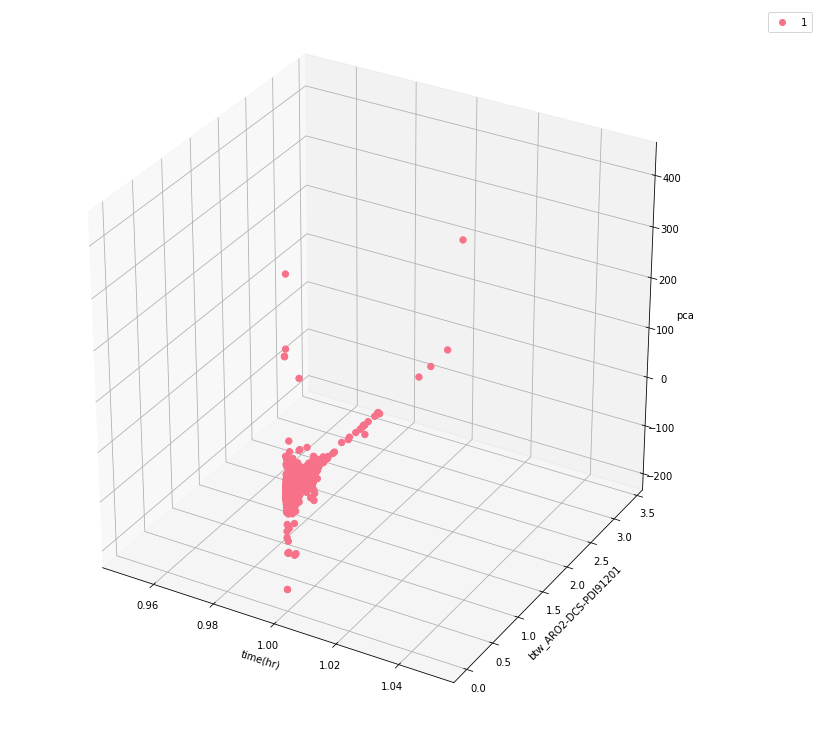

In [12]:
# sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

x = plt_df['btw_t']
y = plt_df['btw_ARO2-DCS-PDI91201']
z = plt_df['pca']

sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel("time(hr)")
ax.set_ylabel("btw_ARO2-DCS-PDI91201")
ax.set_zlabel("pca")

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()


In [13]:
# mean time, R911, PCA
plt_df = test_df[test_df["time"].notnull()]
plt_df

,index,btw_ARO2-DCS-PDI91201,btw_t,ARO2-DCS-FI91601,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,time,mean_ARO2-DCS-PDI91201,pca,mean_pca
0,4617,0.293029,1.0,503.322266,65.611740,93.679619,2.0,0.337991,-2.009857,0.000000e+00
2,4621,0.495370,1.0,504.653687,65.611740,93.679619,2.0,0.352006,-0.110260,0.000000e+00
4,4625,0.493556,1.0,505.644104,65.611740,93.679619,1.0,0.248290,-0.624237,0.000000e+00
5,4628,0.003025,1.0,506.892578,65.611740,93.679619,2.0,0.182353,2.783824,1.894781e-14
7,4632,0.163722,1.0,503.563446,65.611740,93.679619,2.0,0.310270,-0.786733,1.894781e-14
...,...,...,...,...,...,...,...,...,...,...
27678,60659,0.153545,1.0,547.227905,63.099998,68.800003,2.0,0.091758,-4.199076,3.789561e-14
27680,60663,0.121548,1.0,544.290283,63.099998,68.800003,1.0,0.144590,1.222565,0.000000e+00
27681,60666,0.167633,1.0,546.735413,63.099998,68.800003,1.0,0.115624,0.424133,0.000000e+00
27682,60668,0.063616,1.0,547.583679,63.099998,68.800003,2.0,0.089156,-1.147929,3.789561e-14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


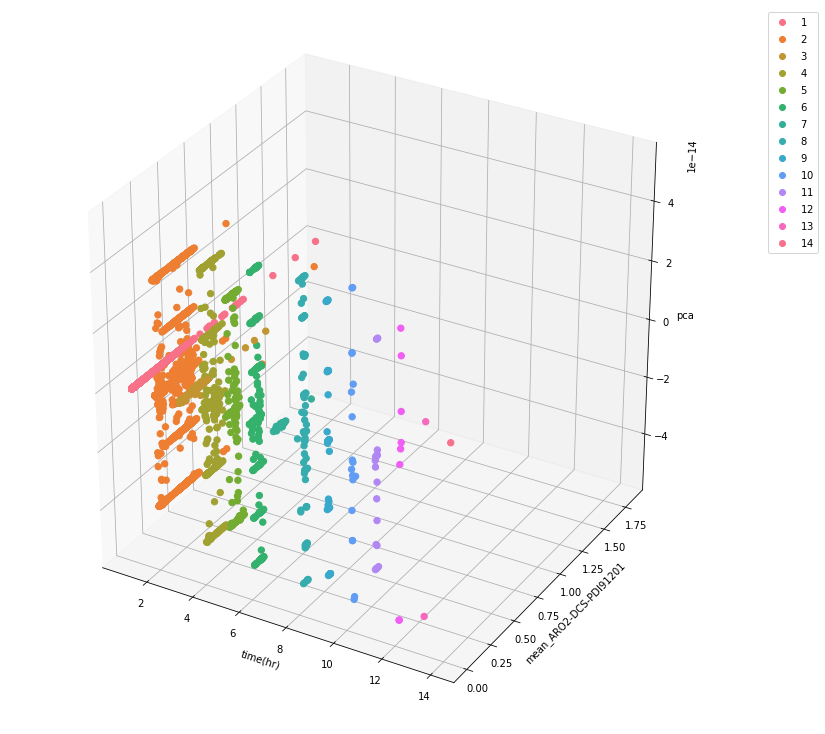

In [14]:
# sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

x = plt_df['time']
y = plt_df['mean_ARO2-DCS-PDI91201']
z = plt_df['mean_pca']

sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel("time(hr)")
ax.set_ylabel("mean_ARO2-DCS-PDI91201")
ax.set_zlabel("pca")

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()